In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics 
from sklearn.metrics import r2_score

In [2]:
data_df = pd.read_csv("C:\\Users\\GANESH01\\Downloads\\laptop-price-predictor-regression-project-main\\laptop_data.csv")
data_df.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
744,744,Lenovo,Workstation,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7600U 2.8GHz,16GB,1TB SSD,Nvidia Quadro M520M,Windows 10,2.5kg,175770.72
856,856,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,23922.72
697,697,Asus,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core M M3-6Y30 0.9GHz,4GB,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.2kg,35644.32
701,701,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9420 2.9GHz,4GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,21258.72
1289,1289,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,38841.12
586,586,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.78kg,79813.44
902,902,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7Y75 1.3GHz,16GB,256GB SSD,Intel HD Graphics 615,Windows 10,1.22kg,87858.72
165,165,MSI,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.4kg,95850.72
674,674,HP,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4GB,128GB SSD,Nvidia GeForce 940MX,Windows 10,1.63kg,37242.72
560,560,Acer,2 in 1 Convertible,11.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Celeron Dual Core N3350 2.0GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.25kg,18594.72


In [3]:
data_df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
data_df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1067,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.62kg,42517.9728
816,Razer,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,95850.7200
811,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg,128671.2000
242,Asus,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,No OS,2.69kg,47365.9200
639,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,1TB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06kg,127818.7200
564,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,44701.9200
848,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,121318.5600
1134,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23kg,32820.4800
950,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8GB,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.0kg,119826.7200
1105,Dell,Ultrabook,12.5,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.5kg,75289.9680


In [5]:
data_df['Inches'].min()

10.1

In [6]:
data_df['Inches'].max()

18.4

In [7]:
data_df['Ram'].min()

'12GB'

In [8]:
data_df['Ram'].max()

'8GB'

In [9]:
data_df['TypeName'].min()

'2 in 1 Convertible'

In [10]:
data_df['TypeName'].max()

'Workstation'

In [11]:
data_df['Memory'].min()

'1.0TB HDD'

In [12]:
data_df['Memory'].max()

'8GB SSD'

In [13]:
data_df['Weight'].min()

'0.69kg'

In [14]:
data_df['Weight'].max()

'4kg'

In [15]:
data_df['Price'].min()

9270.72

In [16]:
data_df['Price'].max()

324954.72

In [17]:
data_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# DATA ANALYSIS

# Checking for missing values & categorical variables 

In [18]:
# Checking for missing values and categorical variables in the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


<Axes: xlabel='Price', ylabel='Density'>

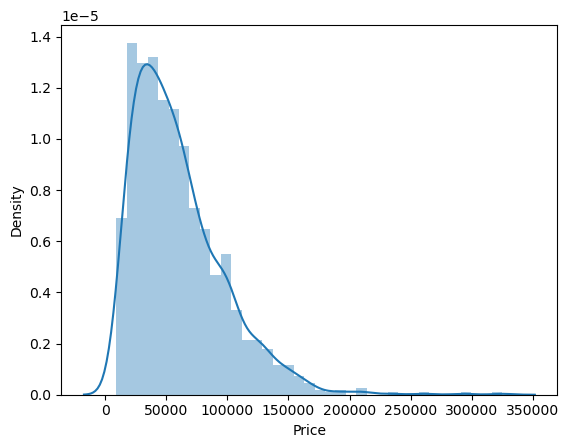

In [19]:
sns.distplot(data_df['Price'])

<Axes: xlabel='Company'>

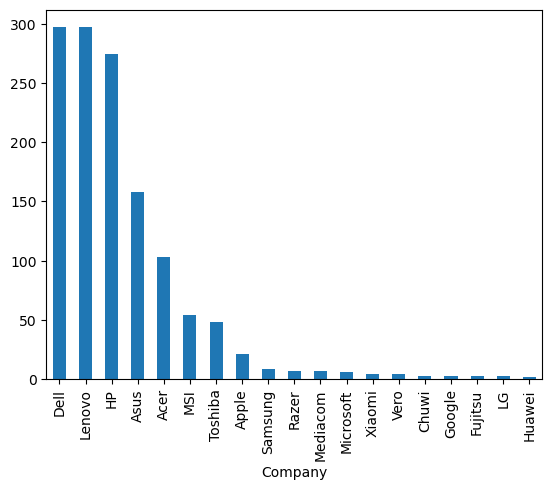

In [20]:
data_df['Company'].value_counts().plot(kind='bar')

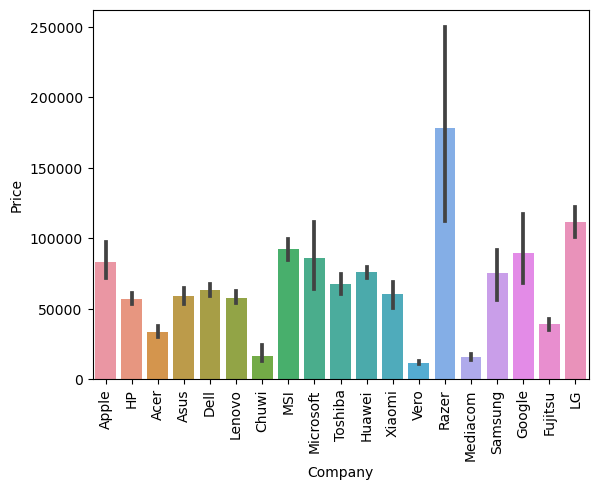

In [21]:
sns.barplot(x=data_df['Company'],y=data_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

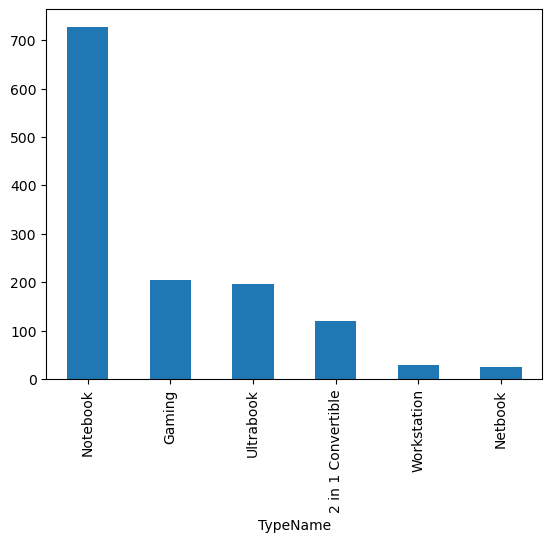

In [22]:
data_df['TypeName'].value_counts().plot(kind='bar')

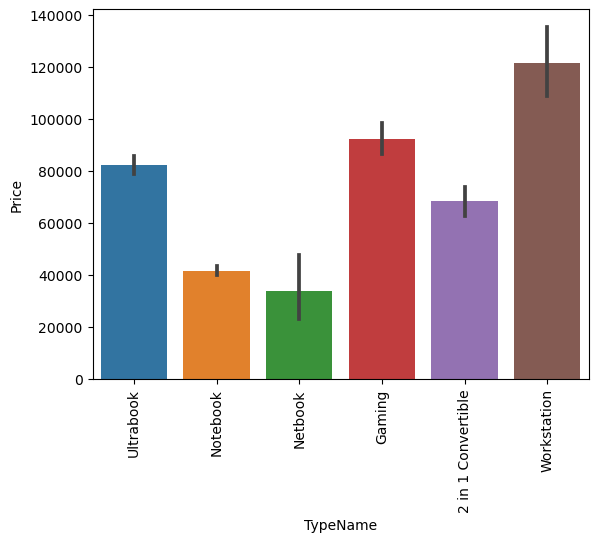

In [23]:
sns.barplot(x=data_df['TypeName'],y=data_df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Density'>

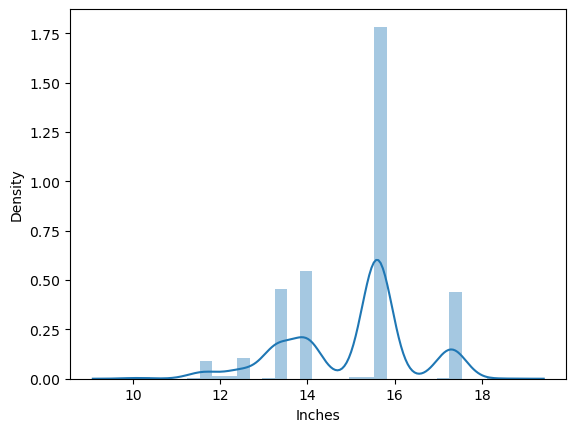

In [24]:
sns.distplot(data_df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

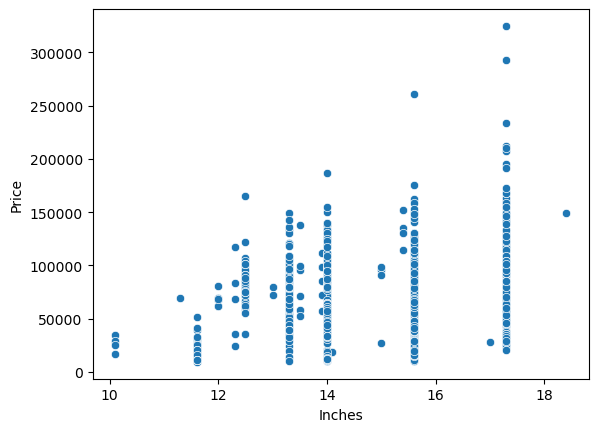

In [25]:
sns.scatterplot(x=data_df['Inches'],y=data_df['Price'])

In [26]:
data_df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [27]:
data_df['Touchscreen'] = data_df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data_df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1208,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2.0GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.3kg,33513.1200,0
71,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,1.4kg,50882.4000,0
289,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,35112.0528,0
1065,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.29kg,77682.2400,0
527,Lenovo,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,8GB,2TB HDD,Nvidia GeForce 920MX,No OS,2.2kg,24455.5200,0


<Axes: xlabel='Touchscreen'>

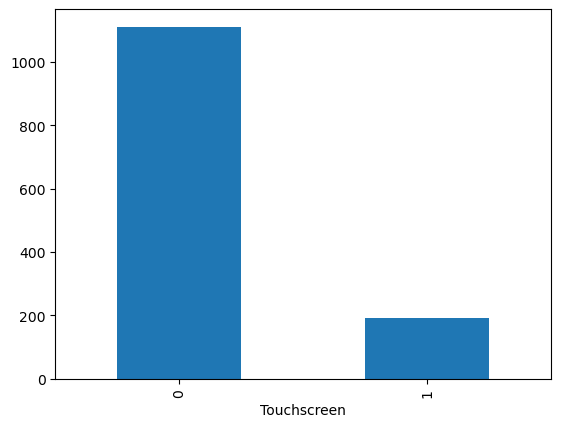

In [28]:
data_df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price'>

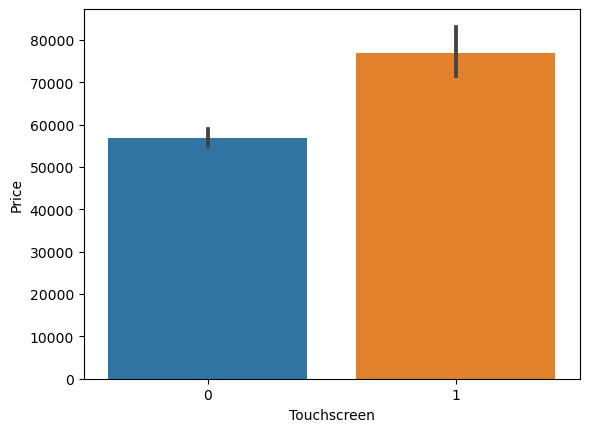

In [29]:
sns.barplot(x=data_df['Touchscreen'],y=data_df['Price'])

In [30]:
data_df['Ips'] = data_df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1


<Axes: xlabel='Ips'>

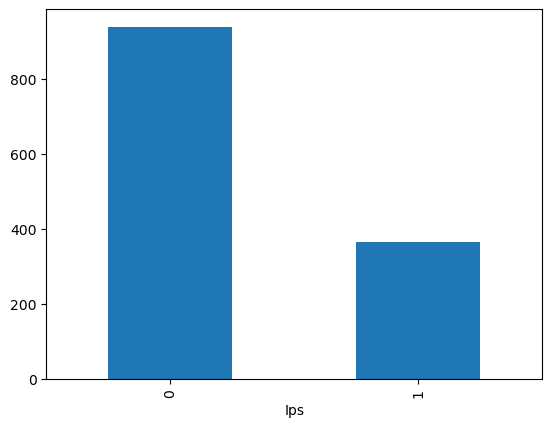

In [31]:
data_df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

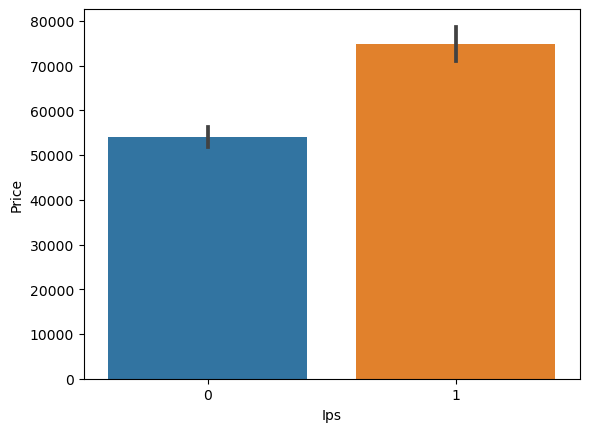

In [32]:
sns.barplot(x=data_df['Ips'],y=data_df['Price'])

In [33]:
new = data_df['ScreenResolution'].str.split('x',n=1,expand=True)

In [34]:
data_df['X_res'] = new[0]
data_df['Y_res'] = new[1]

In [35]:
data_df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
193,Lenovo,Notebook,17.3,1600x900,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Nvidia GeForce MX150,No OS,2.8kg,37189.4400,0,0,1600,900
925,Dell,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,1.95kg,38889.0720,0,0,1366,768
453,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.65kg,71661.6000,0,0,Full HD 1920,1080
758,Dell,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,152859.7872,0,1,IPS Panel 4K Ultra HD 3840,2160
492,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99kg,71928.0000,0,0,Full HD 1920,1080


In [36]:
data_df['X_res'] = data_df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [37]:
data_df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0,1,2560,1600


In [38]:
data_df['X_res'] = data_df['X_res'].astype('int')
data_df['Y_res'] = data_df['Y_res'].astype('int')

In [39]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  Ips               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(2), int32(2), int64(2), object(9)
memory usage: 142.6+ KB


In [40]:
enc=LabelEncoder()
data_df.Company=enc.fit_transform(data_df.Company)
data_df.TypeName=enc.fit_transform(data_df.TypeName)
data_df.ScreenResolution=enc.fit_transform(data_df.ScreenResolution)
data_df.Cpu=enc.fit_transform(data_df.Cpu)
data_df.Ram=enc.fit_transform(data_df.Ram)
data_df.Memory=enc.fit_transform(data_df.Memory)
data_df.Gpu=enc.fit_transform(data_df.Gpu)
data_df.OpSys=enc.fit_transform(data_df.OpSys)
data_df.Weight=enc.fit_transform(data_df.Weight)

In [41]:
data_df.corr()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
Company,1.000000,-0.007718,-0.085784,0.094772,0.044593,-0.008399,0.048086,0.026537,0.134290,-0.159906,0.140371,0.038703,0.118205,0.056234,0.053307
TypeName,-0.007718,1.000000,-0.077428,-0.175618,-0.128174,0.213988,0.019091,-0.204774,0.085223,-0.211832,-0.127313,-0.417188,-0.162855,-0.084792,-0.069762
Inches,-0.085784,-0.077428,1.000000,-0.247841,0.153041,-0.149706,-0.193382,0.215710,0.034528,0.866304,0.068197,-0.361735,-0.114804,-0.071245,-0.095404
ScreenResolution,0.094772,-0.175618,-0.247841,1.000000,0.232751,0.019858,0.059042,0.160816,0.070360,-0.218135,0.331327,0.469176,0.489207,0.482635,0.511921
Cpu,0.044593,-0.128174,0.153041,0.232751,1.000000,-0.077176,-0.013264,0.490761,0.125374,0.139861,0.529334,0.106802,0.154602,0.328736,0.317261
Ram,-0.008399,0.213988,-0.149706,0.019858,-0.077176,1.000000,-0.248580,-0.138212,0.008627,-0.174577,-0.254032,-0.046320,-0.005015,-0.120334,-0.115134
Memory,0.048086,0.019091,-0.193382,0.059042,-0.013264,-0.248580,1.000000,-0.020784,0.035574,-0.218299,0.185680,0.134881,0.052720,0.110286,0.116122
Gpu,0.026537,-0.204774,0.215710,0.160816,0.490761,-0.138212,-0.020784,1.000000,0.103853,0.274961,0.443299,0.005209,0.222020,0.236030,0.225490
OpSys,0.134290,0.085223,0.034528,0.070360,0.125374,0.008627,0.035574,0.103853,1.000000,-0.031506,0.288911,-0.004832,0.092071,0.152301,0.152991
Weight,-0.159906,-0.211832,0.866304,-0.218135,0.139861,-0.174577,-0.218299,0.274961,-0.031506,1.000000,0.030575,-0.338310,-0.069489,-0.105953,-0.129586


# Correlation Matrix

<Axes: >

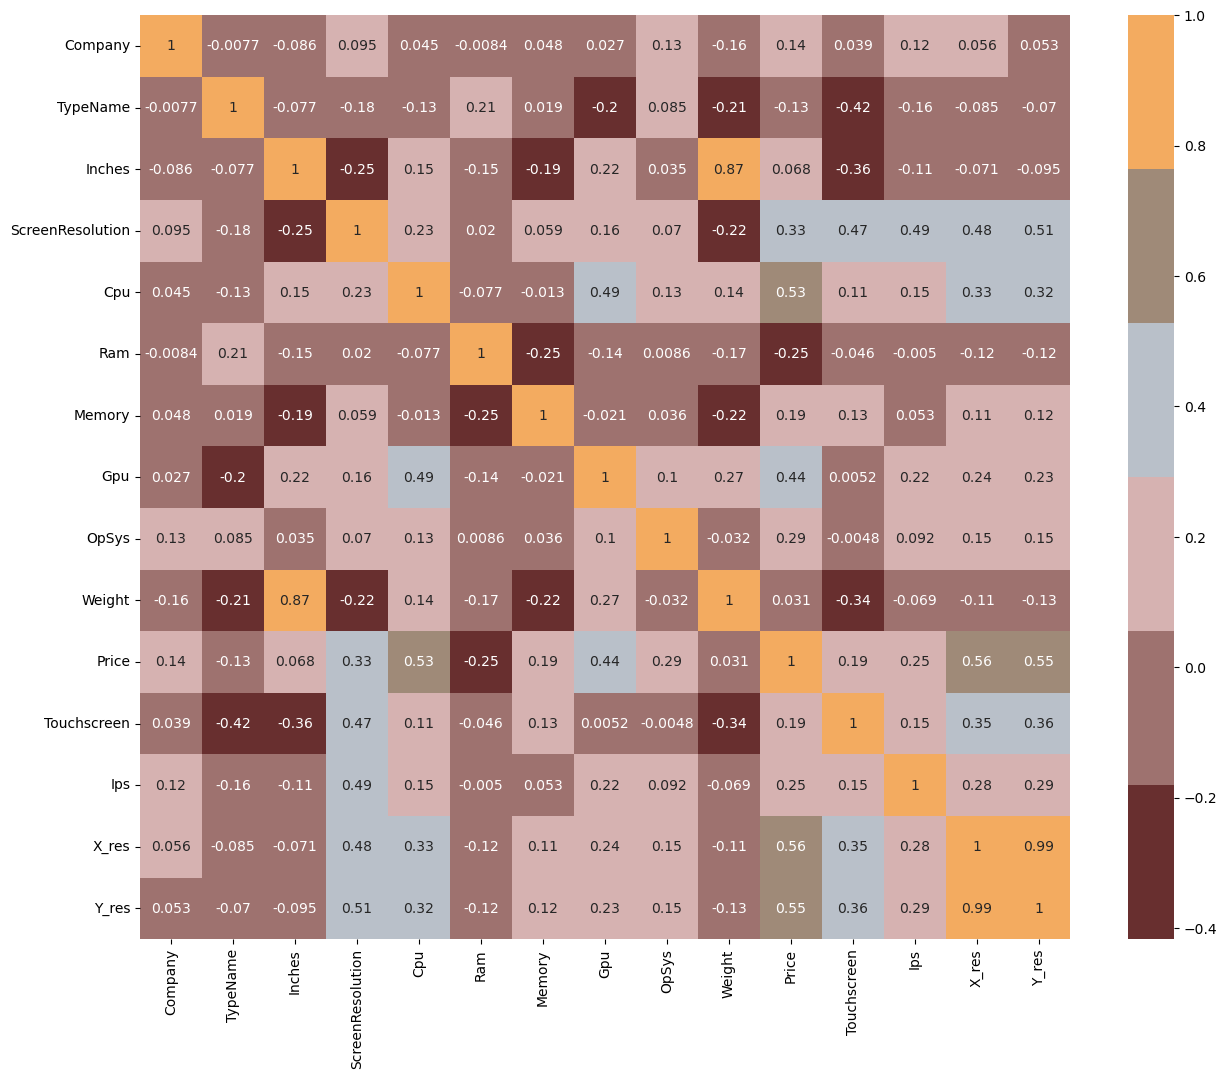

In [42]:
# Examining correlation matrix using heatmap
cmap = sns.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= data_df.corr()
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(corrmat,cmap=cols,annot=True)

# Model Building

In [43]:
# Defining the independent and dependent variables
X= data_df.loc[:,['Company','TypeName','Inches','Ram','Memory','Weight']]
y= data_df["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=25)

In [44]:
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)
accuracy_lr = r2_score(y_test, pred_lr) * 100
print("Accuracy of the Linear Regression model is ", accuracy_lr)

Accuracy of the Linear Regression model is  7.91259071920819


In [45]:
# Lasso Regression
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
pred_lasso = model_lasso.predict(X_test)
accuracy_lasso = r2_score(y_test, pred_lasso) * 100
print("Accuracy of the Lasso Regression model is ", accuracy_lasso)

Accuracy of the Lasso Regression model is  7.911986445361863


In [46]:
# XGBoost Regressor
#model_xgb = XGBRegressor()
#model_xgb.fit(X_train, y_train)
#pred_xgb = model_xgb.predict(X_test)
#accuracy_xgb = r2_score(y_test, pred_xgb) * 100
#print("Accuracy of the XGBoost model is ", accuracy_xgb)

In [47]:
# Decision Tree Regressor
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
pred_dt = model_dt.predict(X_test)
accuracy_dt = r2_score(y_test, pred_dt) * 100
print("Accuracy of the Decision Tree model is ", accuracy_dt)

Accuracy of the Decision Tree model is  58.240173422459605


In [48]:
# Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
accuracy_rf = r2_score(y_test, pred_rf) * 100
print("Accuracy of the Random Forest model is ", accuracy_rf)

Accuracy of the Random Forest model is  73.96600283117691


In [49]:
# K-Nearest Neighbors Regressor
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
pred_knn = model_knn.predict(X_test)
accuracy_knn = r2_score(y_test, pred_knn) * 100
print("Accuracy of the KNN model is ", accuracy_knn)

Accuracy of the KNN model is  41.4157066448702
